In [51]:
import pandas as pd

import seaborn as sns

from collections import Counter

In [52]:
df = pd.read_excel("../data/JIRA-Export-13.10.2022.xlsx")

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4429 entries, 0 to 4428
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Schlüssel                4429 non-null   object 
 1   Zusammenfassung          4429 non-null   object 
 2   Ursprüngliche Schätzung  4350 non-null   float64
 3   Verbleibende Schätzung   4429 non-null   int64  
 4   Benötigte Zeit           4429 non-null   int64  
 5   Priorität                4429 non-null   object 
 6   Beschreibung             4393 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 242.3+ KB


In [54]:
prio_counter = Counter(df["Priorität"])
prio_counter

Counter({'Medium': 3246,
         'High': 837,
         'Störfall Klasse 1': 106,
         'Fachlichkeit fehlt': 64,
         'Low': 176})

# Paar Daten zur Zeitdauer

In [55]:
urspr_counter = Counter(df["Ursprüngliche Schätzung"])
urspr_counter

Counter({14400.0: 3938,
         21600.0: 14,
         144000.0: 16,
         28800.0: 121,
         86400.0: 25,
         7200.0: 22,
         3600.0: 17,
         57600.0: 91,
         316800.0: 1,
         nan: 1,
         nan: 1,
         240.0: 7,
         900.0: 2,
         36000.0: 1,
         43200.0: 22,
         nan: 1,
         nan: 1,
         0.0: 33,
         32400.0: 1,
         nan: 1,
         72000.0: 9,
         nan: 1,
         nan: 1,
         201600.0: 2,
         115200.0: 10,
         nan: 1,
         nan: 1,
         288000.0: 2,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 

-> 14400s = 40h estimation

<AxesSubplot:xlabel='Ursprüngliche Schätzung'>

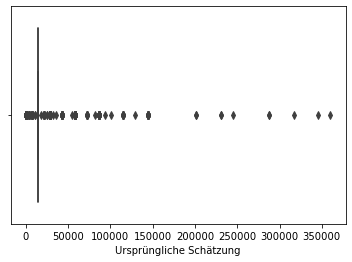

In [56]:
sns.boxplot(x=df["Ursprüngliche Schätzung"])

<AxesSubplot:xlabel='Benötigte Zeit'>

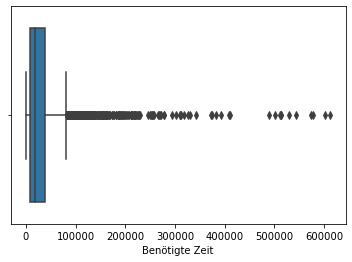

In [57]:
sns.boxplot(x=df["Benötigte Zeit"])

In [58]:
df["Zeitdifferenz"] = df["Ursprüngliche Schätzung"] - df["Benötigte Zeit"]

In [59]:
df["Zeitdifferenz"] = df["Zeitdifferenz"].apply(lambda k: abs(k))

<AxesSubplot:xlabel='Zeitdifferenz'>

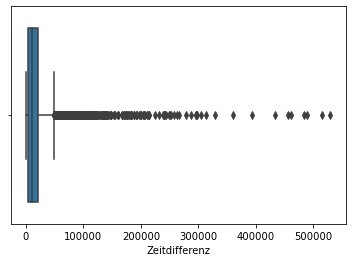

In [60]:
sns.boxplot(x=df["Zeitdifferenz"])

# Paar Daten zur Textlänge

In [61]:
df["len_Zusammenfassung"] = df["Zusammenfassung"].apply(lambda k: len(k))
df["len_Beschreibung"] = df["Beschreibung"].apply(lambda k: len(k) if str(type(k)) != "<class 'float'>" else -1 )

<AxesSubplot:xlabel='len_Zusammenfassung'>

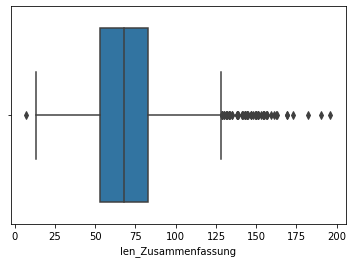

In [62]:
sns.boxplot(x=df["len_Zusammenfassung"])

<AxesSubplot:xlabel='len_Beschreibung'>

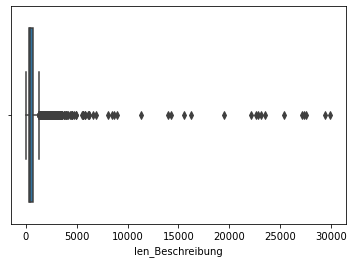

In [63]:
sns.boxplot(x=df["len_Beschreibung"])